<h1>Data Analysis of the Number of Confirmed COVID-19 Cases in the Top Three Countries with the Largest Population in South East Asia</h1>

This data analysis will cover details in relation to the COVID-19 cases in South East Asia, and the behavior of the number of confirmed cases in the top three countries with the largest population will be looked into further. This includes each country's number of cases of those affected by the COVID-19 virus in a certain timeframe. 
<h4> by Beatrice Berenguer </h4>

<h3>Python Libraries</h3>

Before we start preparing the data and conduct exploratory data analysis, it is important that we import the necessary libraries we will need throughout the analysis.

In [90]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Acquiring the Dataset </h3>

We begin the data analysis process by acquiring the confirmed COVID-19 cases dataset into Pandas DataFrames.

In [92]:
covid_df = pd.read_csv('time_series_covid_19_confirmed.csv')
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782


<h3> Data Preparation </h3>

Now that we have our dataset, let's look into our dataset and identify what kind of data we're dealing with.

How much data do we have?

In [93]:
covid_df.shape

(274, 407)

What categories do our data belong to?

In [94]:
covid_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/18/21', '2/19/21', '2/20/21', '2/21/21', '2/22/21', '2/23/21',
       '2/24/21', '2/25/21', '2/26/21', '2/27/21'],
      dtype='object', length=407)

What type of data do these categories contain?

In [95]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 407 entries, Province/State to 2/27/21
dtypes: float64(2), int64(403), object(2)
memory usage: 871.4+ KB


<i> The first ten sets of data </i>

In [96]:
covid_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,548,548,598,598,614,636,646,701,701,726
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,2046795,2054681,2060625,2064334,2069751,2077228,2085411,2093645,2098728,2104197
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,169820,170011,170234,170402,170506,170672,170945,171227,171510,171793
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,118,118,118,118,118,118,118,118,118,118
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5145,5146,5149,5150,5154,5155,5162,5166,5172,5177


<i> The last ten sets of data </i>

In [97]:
covid_df.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
264,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,4083242,4095269,4105675,4115509,4126150,4134639,4144577,4154562,4163085,4170519
265,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,50752,51377,52163,52815,53310,53973,54874,55695,56542,57362
266,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,79548,79598,79632,79654,79681,79717,79749,79773,79804,79836
267,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
268,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,134781,135114,135603,136068,136545,136986,137445,137871,138295,138739
269,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2347,2362,2368,2383,2392,2403,2412,2421,2426,2432
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,171154,171717,172315,173635,174969,176377,177768,179293,180848,181909
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2154,2157,2157,2165,2176,2187,2221,2255,2267,2269
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,72467,73203,73894,74503,75027,75582,76484,77171,77639,78202
273,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,35543,35710,35768,35796,35862,35910,35960,35994,36044,36058


Which data are unique?

In [98]:
covid_df.nunique()

Province/State     85
Country/Region    192
Lat               269
Long              270
1/22/20            11
                 ... 
2/23/21           265
2/24/21           264
2/25/21           264
2/26/21           266
2/27/21           264
Length: 407, dtype: int64

Now knowledgeable with what type of data we are dealing with, the next step should be to clean the data and prepare this based on what we want to find out about the data. This is where we remove any outliers, null values, or unnecessary columns to make our data clean.

Checking for null values:

In [99]:
covid_df.isnull().sum()

Province/State    189
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
2/23/21             0
2/24/21             0
2/25/21             0
2/26/21             0
2/27/21             0
Length: 407, dtype: int64

Data shown above states that the "Province/State", "Lat", and "Long" columns contain data with null values. 

Let's take a look at these values:

In [100]:
covid_df.loc[covid_df['Province/State'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2347,2362,2368,2383,2392,2403,2412,2421,2426,2432
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,171154,171717,172315,173635,174969,176377,177768,179293,180848,181909
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2154,2157,2157,2165,2176,2187,2221,2255,2267,2269
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,72467,73203,73894,74503,75027,75582,76484,77171,77639,78202


In [101]:
covid_df.loc[covid_df['Lat'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
52,Repatriated Travellers,Canada,NaN,NaN,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13


Since our data analysis later on will only be dependent on the "Country/Region" of each set of data, removing of null values in the "Province/State", "Lat", and "Long" columns can be done by simply dropping these.

In [102]:
covid2_df = covid_df
covid2_df = covid2_df.drop(["Province/State", "Lat", "Long"], axis=1)
covid2_df.isnull().sum()

Country/Region    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
2/23/21           0
2/24/21           0
2/25/21           0
2/26/21           0
2/27/21           0
Length: 404, dtype: int64

Now that all null values have been removed, let us fix any differences in the formatting of the data. Upon observation, there are no formatting issues in our current dataset. To clean our data further, we can check for any duplicates in our dataset.

In [103]:
duplicate = covid2_df[covid2_df.duplicated()]
duplicate

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21


There are no duplicates in our current dataset.

How much data are we left with after data cleaning?

In [104]:
covid2_df.shape

(274, 404)

Our 274 rows and 404 columns of data are now ready to undergo data analysis.

<h3> Data Analysis </h3>
In this section, we will be analyzing the sets of data relating to the scenario in hand: <i> The behavior of the number of confirmed cases in the top three countries with the largest population in South East Asia. </i>

What countries are present in the dataset?

In [21]:
countries = covid2_df['Country/Region'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

Now knowing which data of what countries are present in our dataset, the top three countries with the largest population in South East Asia will be extracted. Research says that these countries are Indonesia, Philippines, and Vietnam as of 2020.

<i> Reference: Worldometer. (2021). South-Eastern Asia population. Retrieved from https://www.worldometers.info/world-population/south-eastern-asia-population/</i>

These three countries have these numbers of confirmed cases as of February 27, 2021 in our dataset:

In [105]:
IDN_df = covid2_df.loc[covid2_df['Country/Region'] == 'Indonesia']
IDN_df = IDN_df.drop(['Country/Region'], axis=1)
IDN_df['2/27/21']

147    1329074
Name: 2/27/21, dtype: int64

Indonesia with a population of 273,523,615 has 1,329,074 confirmed cases.

In [106]:
PH_df = covid2_df.loc[covid2_df['Country/Region'] == 'Philippines']
PH_df = PH_df.drop(['Country/Region'], axis=1)
PH_df['2/27/21']

208    574247
Name: 2/27/21, dtype: int64

Philippines with a population of 109,581,078 has 574,247 confirmed cases.

In [107]:
VT_df = covid2_df.loc[covid2_df['Country/Region'] == 'Vietnam']
VT_df = VT_df.drop(['Country/Region'], axis=1)
VT_df['2/27/21']

269    2432
Name: 2/27/21, dtype: int64

Vietnam with a population of 97,338,579 has 2,432 confirmed cases.


Looking into these countries' number of cases further, we can see the behavior of the cases as time progresses.

<i> Cases in Indonesia: </i>

<ipython-input-64-1d42c1e45ec2>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(cols)


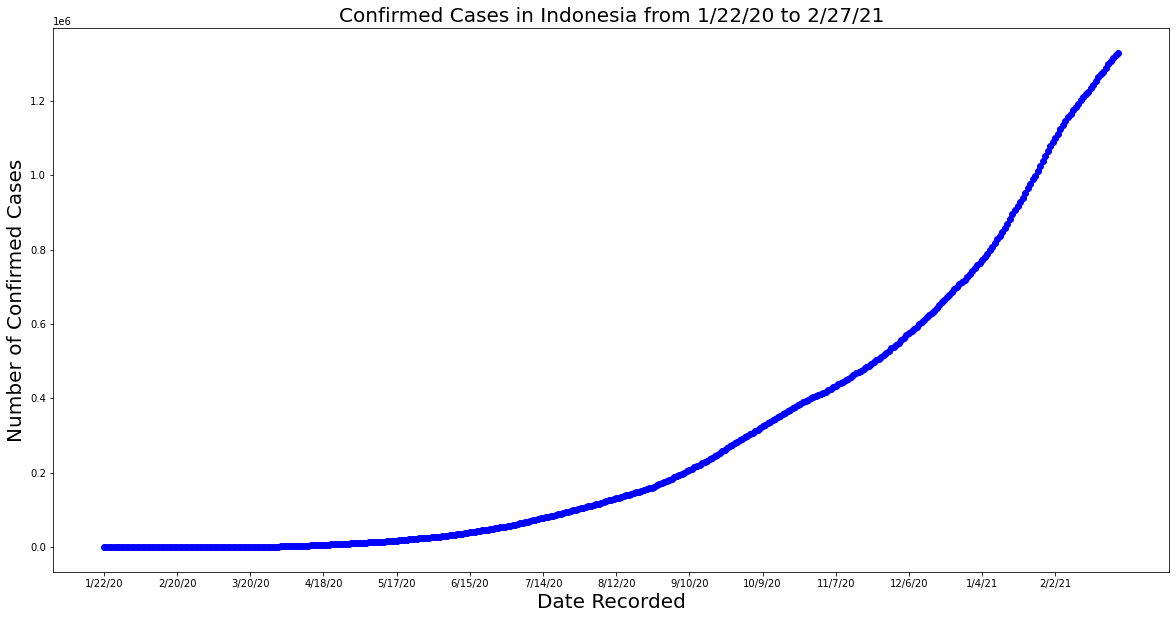

In [64]:
cols = list(IDN_df.columns.values)
plt.figure(figsize=(20,10))
for i in range(0,len(cols)):
    plt.scatter(i, IDN_df[cols[i]], color='blue')
plt.xticks(list(range(0,len(cols))))
plt.axes().set_xticklabels(cols)
plt.locator_params(axis="x", nbins=14)
plt.title('Confirmed Cases in Indonesia from 1/22/20 to 2/27/21', size=20)
plt.xlabel('Date Recorded', size=20)
plt.ylabel('Number of Confirmed Cases', size=20)
plt.show()

The graph representing the Confirmed Cases in Indonesia from 1/22/20 to 2/27/21 shows the beginning of the rise of cases near the 3/20/20 mark. We can see that from this point, the number of cases increase at an almost fixed rate as time progresses.

<i> Cases in the Philippines: </i>

<ipython-input-65-67d5af9b9076>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(cols)


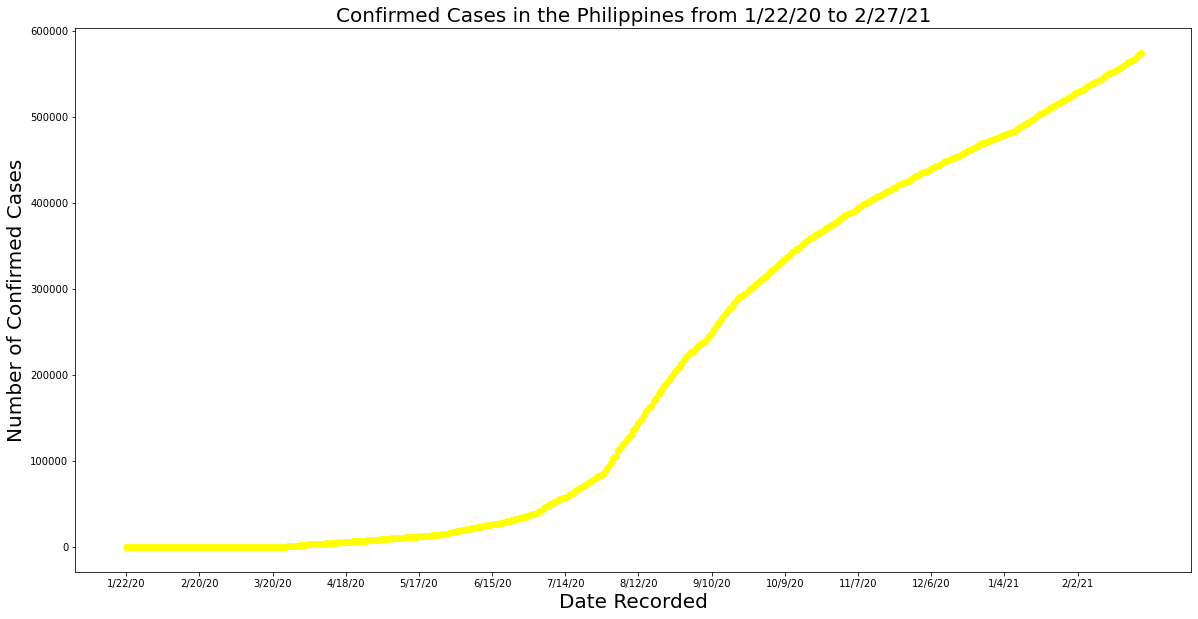

In [65]:
cols = list(PH_df.columns.values)
plt.figure(figsize=(20,10))
for i in range(0,len(cols)):
    plt.scatter(i, PH_df[cols[i]], color='yellow')
plt.xticks(list(range(0,len(cols))))
plt.axes().set_xticklabels(cols)
plt.locator_params(axis="x", nbins=14)
plt.title('Confirmed Cases in the Philippines from 1/22/20 to 2/27/21', size=20)
plt.xlabel('Date Recorded', size=20)
plt.ylabel('Number of Confirmed Cases', size=20)
plt.show()

The graph representing the Confirmed Cases in the Philippines from 1/22/20 to 2/27/21 shows the beginning of the rise of cases near the 3/20/20 mark as well, similar to the behavior of the previous graph. We can see that from this point, the number of cases increase rapidly as time progresses. In between the 7/14/20 and 8/12/20 mark, it can be observed that the number of cases went through a significant leap.

<i> Cases in Vietnam: </i>

<ipython-input-66-78515dc2d427>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(cols)


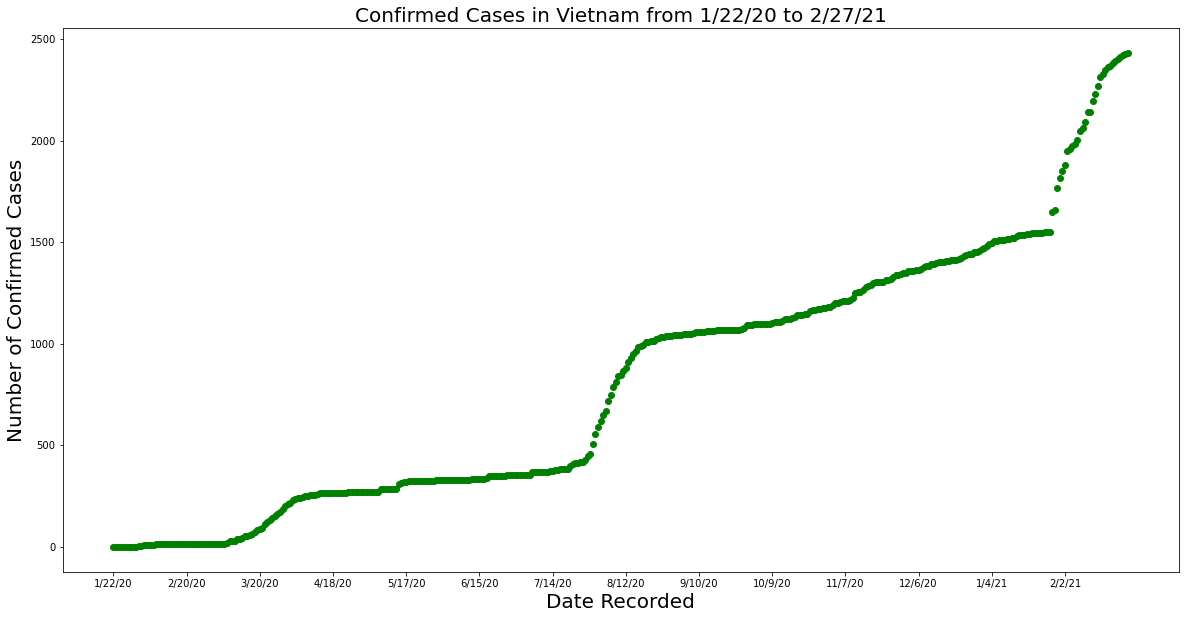

In [66]:
cols = list(VT_df.columns.values)
plt.figure(figsize=(20,10))
for i in range(0,len(cols)):
    plt.scatter(i, VT_df[cols[i]], color='green')
plt.xticks(list(range(0,len(cols))))
plt.axes().set_xticklabels(cols)
plt.locator_params(axis="x", nbins=14)
plt.title('Confirmed Cases in Vietnam from 1/22/20 to 2/27/21', size=20)
plt.xlabel('Date Recorded', size=20)
plt.ylabel('Number of Confirmed Cases', size=20)
plt.show()

The graph representing the Confirmed Cases in Vietnam from 1/22/20 to 2/27/21 shows the beginning of the rise of cases near the 1/22/20 mark, but is stabilized until another rise near the 3/20/20 mark as well. Unlike the previous graphs, the 3/20/20 mark does not indicate a continuous rise in the number of cases, as there are many instances where the number of cases were stabilized as time progresses. A similar scenario can be observed in between the 7/14/20 and 8/12/20 mark, where Vietnam goes through another surge in cases but is later on stabilized.

<h3> Data Visualization </h3>

Putting together the observations on the three graphs illustrated in the Data Analysis section, it can be concluded that all three countries experienced a significant rise in the number of confirmed cases at around the 3/20/20 mark. To take a closer look into the behavior of the cases at this mark, the graph below shows the confirmed cases recorded until the 3/20/20 mark in the three countries.

<ipython-input-79-bdeb82301094>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(cols)


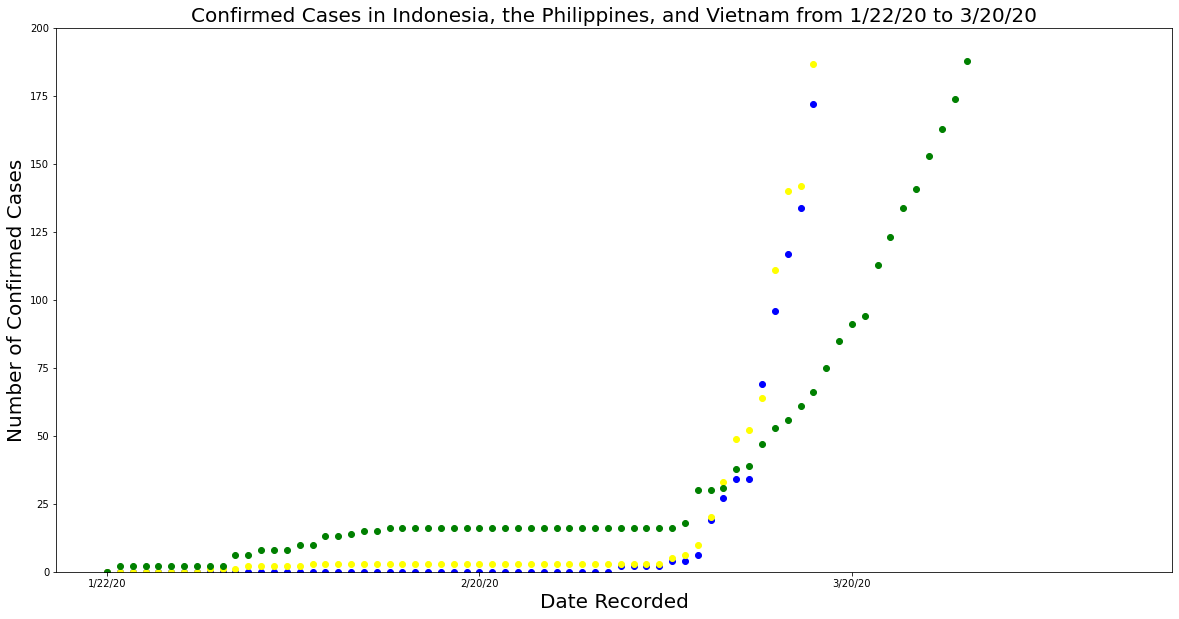

In [79]:
cols = list(VT_df.columns.values)
plt.figure(figsize=(20,10))
for i in range(0,80):
    plt.scatter(i, IDN_df[cols[i]], color='blue')
    plt.scatter(i, PH_df[cols[i]], color='yellow')
    plt.scatter(i, VT_df[cols[i]], color='green')
plt.xticks(list(range(0,len(cols))))
plt.axes().set_xticklabels(cols)
plt.locator_params(axis="x", nbins=14)
plt.ylim(0,200)

plt.title('Confirmed Cases in Indonesia, the Philippines, and Vietnam from 1/22/20 to 3/20/20', size=20)
plt.xlabel('Date Recorded', size=20)
plt.ylabel('Number of Confirmed Cases', size=20)
plt.show()

In the graph "The First 200 Confirmed Cases in Indonesia, the Philippines, and Vietnam," we have a clearer illustration showing the observations made earlier regarding the rise in the number of cases in the three countries near the 1/22/20 and 3/20/20 marks. The number of cases in Vietnam started to increase in between 1/22/20 and 2/20/20, but was able to stabilize this number until in between 2/20/20 and 3/20/20. In this timeframe, we can also see that Vietnam was first to experience the rise in number of cases in comparison to Indonesia and the Philippines. However, in the next few records, the number of cases in Indonesia and the Philippines rapidly increased at a much faster rate than Vietnam's. 

Observed in the "Confirmed Cases in the Philippines from 1/22/20 to 2/27/21" and "Confirmed Cases in Vietnam from 1/22/20 to 2/27/21" graphs, data shows that there is also a significant rise in number of cases in between the 7/14/20 and 8/12/20 marks. This will be looked into further by illustrating the graph showing the confirmed cases recorded in between the dates 7/14/20 and 8/12/20.

<ipython-input-89-a7e8e95ec574>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(cols)


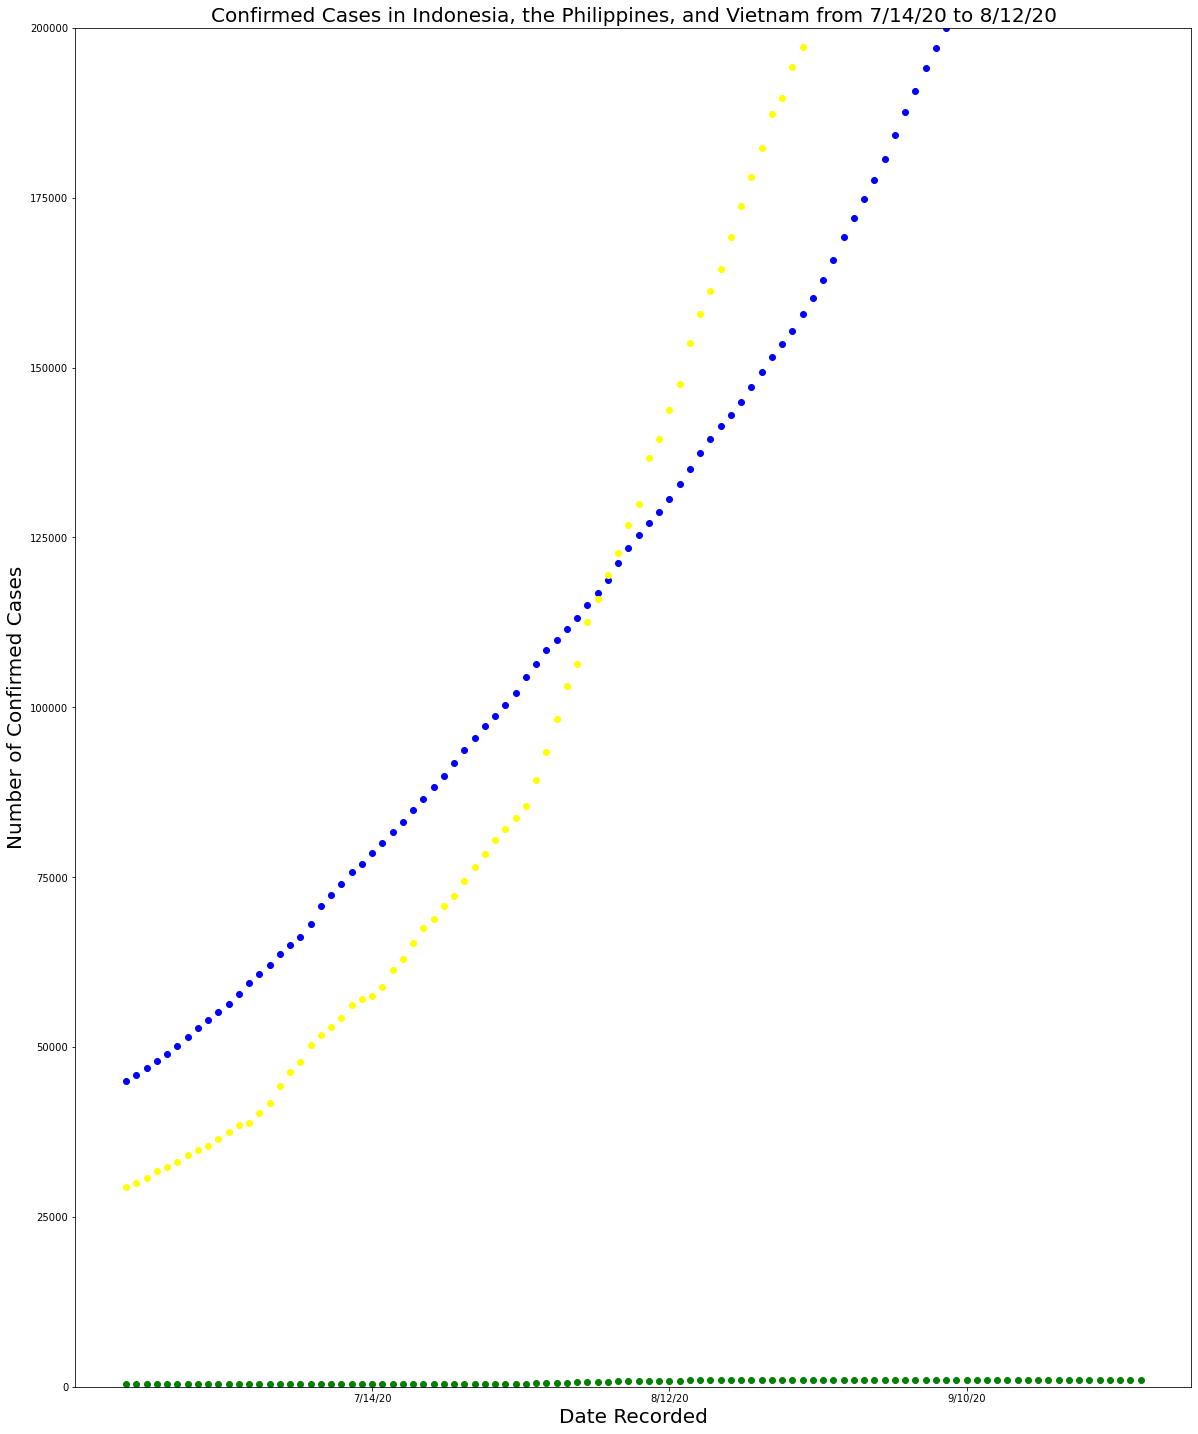

In [89]:
cols = list(VT_df.columns.values)
plt.figure(figsize=(20,25))
for i in range(150,250):
    plt.scatter(i, IDN_df[cols[i]], color='blue')
    plt.scatter(i, PH_df[cols[i]], color='yellow')
    plt.scatter(i, VT_df[cols[i]], color='green')
plt.xticks(list(range(0,len(cols))))
plt.axes().set_xticklabels(cols)
plt.locator_params(axis="x", nbins=14)
plt.ylim(0,200000)

plt.title('Confirmed Cases in Indonesia, the Philippines, and Vietnam from 7/14/20 to 8/12/20', size=20)
plt.xlabel('Date Recorded', size=20)
plt.ylabel('Number of Confirmed Cases', size=20)
plt.show()

The graph "Confirmed Cases in Indonesia, the Philippines, and Vietnam from 7/14/20 to 8/12/20" shows the massive differences in the rise in number of cases in Indonesia, the Philippines, and Vietnam. While all countries experienced a surge in the 7/14/20 to 8/12/20 timeframe, the Philippines went through a rapid and highly significant one. Being in between Indonesia and Vietnam in terms of population size, it is alarming how the Philippines' cases rose at a higher rate compared to Indonesia, while Vietnam was also able to manage and stabilize their number of cases. 

<h3> Conclusion </h3>

The data analysis on the behavior of the number of confirmed cases in the top three countries with the largest population in South East Asia showed the differences in the rise in number of cases in Indonesia, the Philippines, and Vietnam in relation to their population size. Initial observations extracted timeframes between the three countries with similar behavior in their graphs. This opened the research to analyze more closely the data in timeframes 1/20/20 to 3/20/20 and 7/14/20 to 8/12/20. Analysis in these timeframes showed that Vietnam was first to be struck by the rise in COVID-19 cases among the three countries, but managed to stabilize its numbers. After being hit with the same rise in number of cases in Indonesia and the Philippines, the two countries exceeded Vietnam's rate of increase. 

With the rapid rate of increase in cases in Indonesia and the Philippines, we can see that the Philippines experiences a highly significant surge in the 7/14/20 and 8/12/20 timeframe in comparison to the two other countries. This observation may indicate that the handling of cases in the Philippines wasn't managed as well as in the other two countries. Indonesia's cases seemed to increase at a fixed rate as soon as the cases hit their country, while the Philippines experienced a long period of continuous increase in cases as time progressed. Vietnam, on the other hand, continues to stabilize their numbers. This shows how Vietnam is managing their COVID-19 pandemic situation much better than the other two countries, given their small differences in population size but massive differences in number of cases.